<a href="https://colab.research.google.com/github/N335HMAVA5UD3V/Cognorise-infotech/blob/main/Tour%26Travel_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1>**Tour and Travel Customer Churn Prediction**

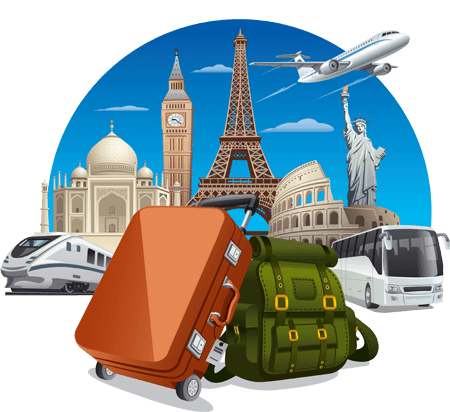<center>

#**Importing Libraries**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve , auc

#**Loading Dataset**

In [67]:
df=pd.read_csv('/content/drive/MyDrive/CognoRise/Customertravel.csv')
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
...,...,...,...,...,...,...,...
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0


#**Attributes**

* **Age** Age of user
* **FrequentFlyer** whether customer takes frequent flights
* **AnnualIncomeClass** Class of annual income of user
* **ServicesOpted** Number of times services opted during recent years
* **AccountSyncedToSocialMedia** Whether Company Account Of User Synchronised to Their Social Media
* **BookedHotelOrNot** Whether the customer book lodgings/Hotels using company services
* **Target** 1- Customer Churns, 0- Customer Doesnt Churn


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


# **Checking missing values**

In [69]:
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

# **checking datat types**

In [70]:
df.dtypes

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object

# **unique values in column with object datatype**

In [71]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*50)

FrequentFlyer
['No' 'Yes' 'No Record']
--------------------------------------------------
AnnualIncomeClass
['Middle Income' 'Low Income' 'High Income']
--------------------------------------------------
AccountSyncedToSocialMedia
['No' 'Yes']
--------------------------------------------------
BookedHotelOrNot
['Yes' 'No']
--------------------------------------------------


In [72]:
le = LabelEncoder()
features = ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']
for f in features:
  df[f] = le.fit_transform(df[f])
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0
...,...,...,...,...,...,...,...
949,31,2,1,1,0,0,0
950,30,0,2,5,0,1,0
951,37,0,2,4,0,0,0
952,30,0,1,1,1,1,0


#**EDA**

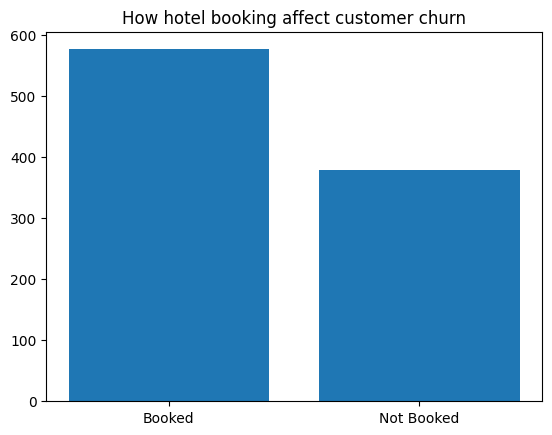

In [73]:
plt.bar(["Booked","Not Booked"],df['BookedHotelOrNot'].value_counts())
plt.title("How hotel booking affect customer churn")
plt.show()

In [74]:
df['AnnualIncomeClass'].value_counts()

AnnualIncomeClass
2    409
1    386
0    159
Name: count, dtype: int64

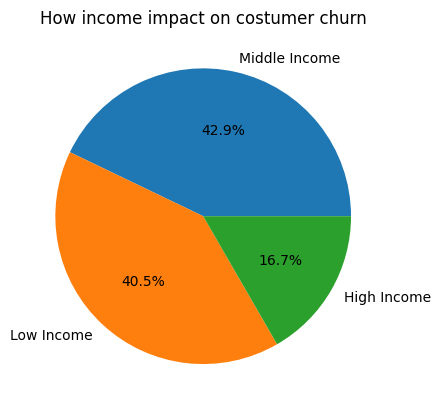

In [75]:
plt.pie(df['AnnualIncomeClass'].value_counts(), labels = ["Middle Income","Low Income","High Income"],autopct='%1.1f%%')
plt.title("How income impact on costumer churn")
plt.show()


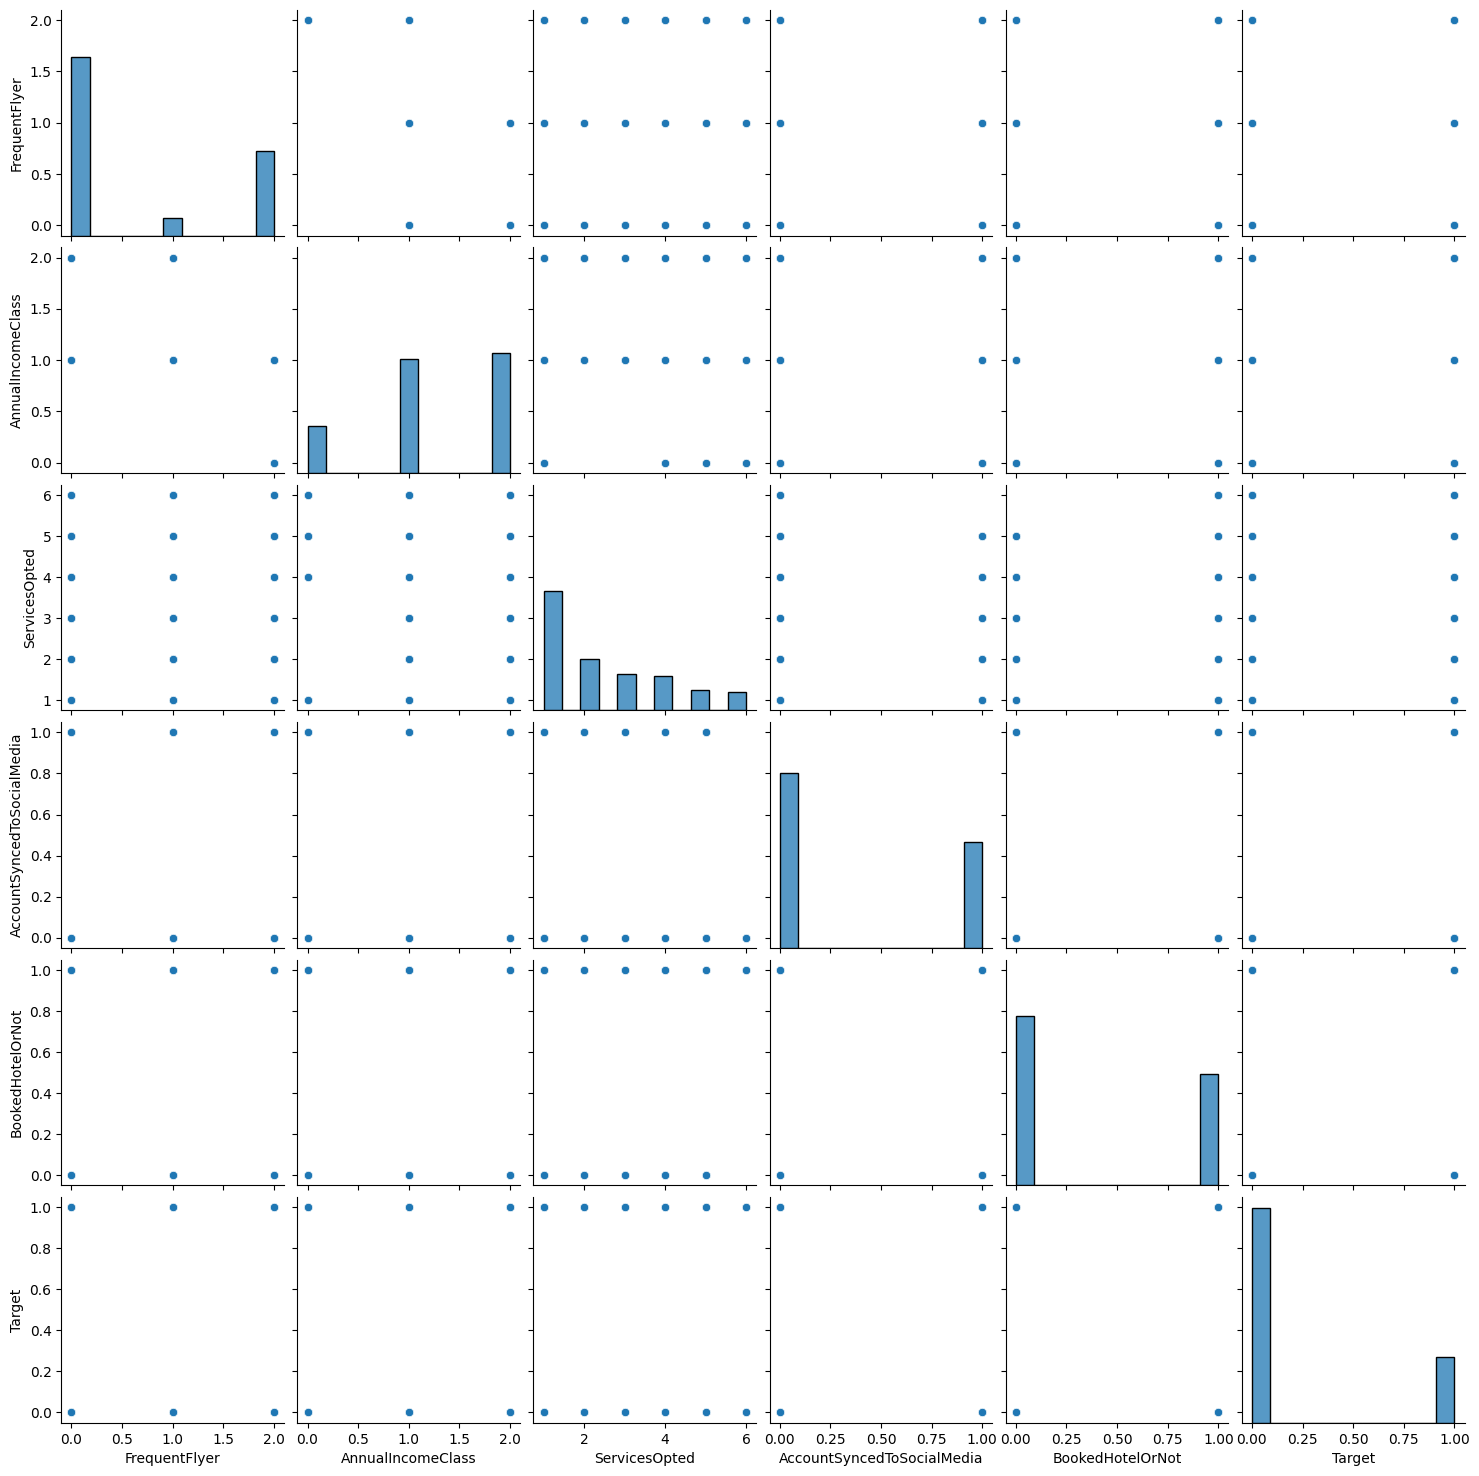

In [88]:
sns.pairplot(df.iloc[:,1:],vars = list(df)[1:], hue=None,diag_kind="hist",corner=False)

# **Splitting dataset**

In [76]:
X = df.iloc[:,:-1]
y = df['Target']

In [77]:
X

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,0,2,6,0,1
1,34,2,1,5,1,0
2,37,0,2,3,1,0
3,30,0,2,2,0,0
4,30,0,1,1,0,0
...,...,...,...,...,...,...
949,31,2,1,1,0,0
950,30,0,2,5,0,1
951,37,0,2,4,0,0
952,30,0,1,1,1,1


In [78]:
y

0      0
1      1
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Target, Length: 954, dtype: int64

In [79]:
y.value_counts()

Target
0    730
1    224
Name: count, dtype: int64

In [80]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)
X

array([[0.63636364, 0.        , 1.        , 1.        , 0.        ,
        1.        ],
       [0.63636364, 1.        , 0.5       , 0.8       , 1.        ,
        0.        ],
       [0.90909091, 0.        , 1.        , 0.4       , 1.        ,
        0.        ],
       ...,
       [0.90909091, 0.        , 1.        , 0.6       , 0.        ,
        0.        ],
       [0.27272727, 0.        , 0.5       , 0.        , 1.        ,
        1.        ],
       [0.36363636, 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size = 0.3)


In [82]:
X_test.shape,y_test.shape

((287, 6), (287,))

In [83]:
X_train.shape,y_train.shape

((667, 6), (667,))

In [84]:
# models
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()
models = [knn, svc, nb, rf, ad]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       221
           1       0.71      0.67      0.69        66

    accuracy                           0.86       287
   macro avg       0.81      0.79      0.80       287
weighted avg       0.86      0.86      0.86       287

SVC()
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       221
           1       0.64      0.44      0.52        66

    accuracy                           0.82       287
   macro avg       0.75      0.68      0.70       287
weighted avg       0.80      0.82      0.80       287

GaussianNB()
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       221
           1       0.66      0.59      0.62        66

    accuracy                           0.84       287
   macro avg       0.77      0.75      0.76       287
weighted avg       0.83      0.8

In [85]:
rf1 = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
y_pred1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1])

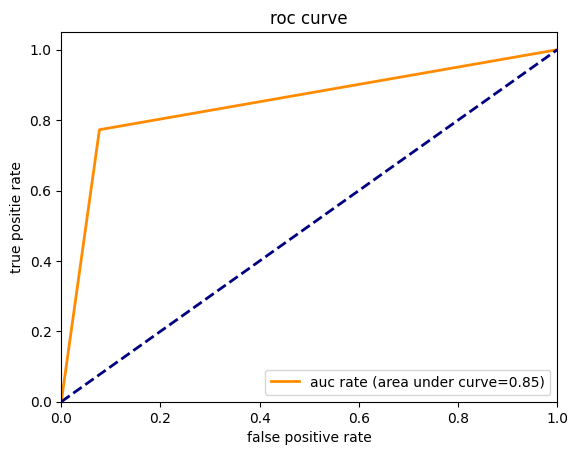

In [86]:
fpr_rf,tpr_rf,treshold = roc_curve(y_test,y_pred1)
auc_value = auc(fpr_rf, tpr_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='auc rate (area under curve=%.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('roc curve')
plt.xlabel('false positive rate')
plt.ylabel('true positie rate')
plt.legend(loc='lower right')
plt.show()